In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
Olympics= pd.read_csv("C:\\Users\\Jim/Downloads/athlete_events.csv/athlete_events.csv")
swim= Olympics[Olympics['Sport'] == 'Swimming']
Medals=['Gold', 'Silver', 'Bronze']; winner=swim['Medal'].isin(Medals)
swim_champ=pd.DataFrame(swim[winner])
swim_champ_year=swim_champ.sort_values('Year', ascending = False)
modern_champ= swim_champ_year[swim_champ_year['Year'] > 1990]
gold=swim_champ[swim_champ['Medal']== 'Gold']
powerlifting= pd.read_csv('openpowerlifting.csv')
powerlifting_tidy=powerlifting.fillna(0)
Powerlifting_tidy=powerlifting_tidy[powerlifting_tidy['Age'] > 14]
strong= Powerlifting_tidy[Powerlifting_tidy['TotalKg'] > 557]

C:\Users\Jim\anacondaforjupiter\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#INSIGHTS OBTAINED BY DATA ANALYSIS

In [3]:
# 1. Male swimmers benefit from being taller more than female swimmers
#The difference in mean height between gold, silver and bronze winners is greater in males than females


In [4]:
swim_champ.groupby(['Medal', 'Sex'])['Height'].mean()

Medal   Sex
Bronze  F      173.405914
        M      185.942584
Gold    F      174.348730
        M      188.021912
Silver  F      174.282116
        M      186.832957
Name: Height, dtype: float64

In [ ]:
# 2. Top performing powerlifters tend to peak at a later age than Olympic swimmers
#The average age of a powerlifter lifting over 557kg in total between their benchpress, squat and deadlift is around 30
#The average age of a gold medal winning Olympic swimmer is around 20
#Powerlifters benefit from muscle mass developed over years, swimmers benefit from speed and energy associated with youth

In [12]:
strong['Age'].mean()

30.109586034754464

In [13]:
gold['Age'].mean()

20.77676120768527

In [14]:
# 3. Taller and heavier athletes tend to perform the best in Olympic swimming
#From the chart below, it can be seen that gold medal winners are usually taller and heavier
#than the winners of other medals, and this is clearer in male athletes than female athletes

In [15]:
swim_champ.groupby(['Medal', 'Sex'])[['Weight', 'Height']].agg([min, max, np.mean])

Weight                   Height                   
              min    max       mean    min    max        mean
Medal  Sex                                                   
Bronze F     45.0   81.0  63.706371  142.0  193.0  173.405914
       M     54.0  107.0  80.211302  152.0  208.0  185.942584
Gold   F     48.0   85.0  64.179669  157.0  193.0  174.348730
       M     61.0  114.0  82.523469  160.0  206.0  188.021912
Silver F     48.0   85.0  64.312500  152.0  192.0  174.282116
       M     54.0  105.0  81.144208  152.0  204.0  186.832957

In [16]:
# 4. US and Australia dominate Olympic swimming in the 21st century,
#while UK and Hungary were the most successful Olympic swim teams in the early 20th century

#The charts also show that the modern American male athletes have won more gold than their female counterparts,
#and that the modern Australian female athletes have won more gold than their male counterparts

[Text(0.5, 1.0, 'Gold winning countries of the 21st century')]

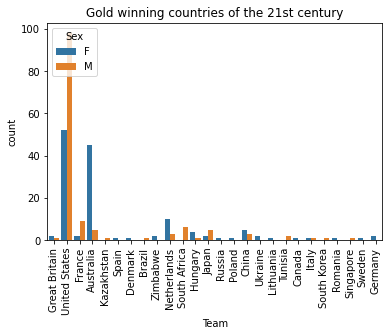

In [17]:
new_millenium= gold[gold['Year'] > 2000]
modern_winning_countries=sns.countplot(x='Team', data=new_millenium, hue='Sex')
modern_winning_countries.set_xticklabels(modern_winning_countries.get_xticklabels(), rotation=90)
modern_winning_countries.set(title= "Gold winning countries of the 21st century")

[Text(0.5, 1.0, 'Gold winning countries between 1896 and 1920')]

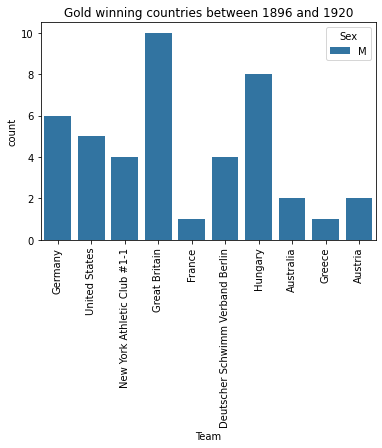

In [18]:
history=gold[gold['Year'] < 1910]
past_winning_countries=sns.countplot(x='Team', data=history, hue='Sex' )

past_winning_countries.set_xticklabels(past_winning_countries.get_xticklabels(), rotation=90)
past_winning_countries.set(title= "Gold winning countries between 1896 and 1920")

In [19]:
# 5. Older male athletes do better in events over longer distances than shorter ones
#This may be due to older athletes having better endurance than speed and power production

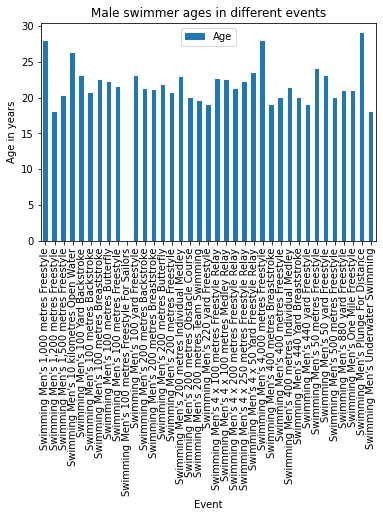

In [20]:
men_swim_gold=gold[gold['Sex']== 'M']

men_swim_gold.groupby(['Event'])['Age'].mean().plot.bar(legend=True).set(title="Male swimmer ages in different events")

plt.ylabel("Age in years")
plt.show()